R = 1 - 1/n_p SUM(np to i=1 of Fi)

*   here n_p is the total number of species in the first guild (ei pollinators),

*   but I would like to do this for all minor species in bipartite, eg by Relay bus etc, or by substation etc
*   Fi is the fraction of reamining species in the second guild (ei plants) after remvoing i species or connections

STEPS

1.   sequential removal, node degree etc
2.   network collapse
3.   robustness index calc, basically area under this curve


here robustness is scored when a signifigant portion of the guild can no longer sustain themselves



example code, random removal used, need to test different removals

Robustness (R): 0.941


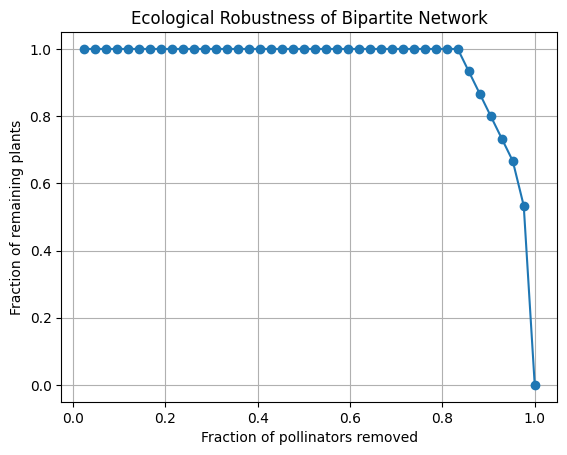

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Function to create a random bipartite network
def create_bipartite_network(num_plants, num_pollinators, connection_prob):
    B = nx.Graph()

    # Add nodes for plants and pollinators
    plants = [f'Plant_{i}' for i in range(num_plants)]
    pollinators = [f'Pollinator_{i}' for i in range(num_pollinators)]

    B.add_nodes_from(plants, bipartite=0)  # bipartite=0 for plants
    B.add_nodes_from(pollinators, bipartite=1)  # bipartite=1 for pollinators

    # Add edges based on a probability (connection between plants and pollinators)
    for plant in plants:
        for pollinator in pollinators:
            if random.random() < connection_prob:
                B.add_edge(plant, pollinator)

    return B, plants, pollinators

# Function to calculate the fraction of remaining plants
def calculate_remaining_plants(B, plants):
    remaining_plants = 0
    for plant in plants:
        if len(B[plant]) > 0:  # If plant still has connections
            remaining_plants += 1
    return remaining_plants / len(plants)

# Function to calculate robustness R
def calculate_robustness(B, plants, pollinators):
    removed_pollinators = 0
    robustness_curve = []

    # Randomly remove pollinators one by one
    random.shuffle(pollinators)

    for pollinator in pollinators:
        removed_pollinators += 1
        B.remove_node(pollinator)
        remaining_plants_fraction = calculate_remaining_plants(B, plants)
        robustness_curve.append((removed_pollinators / len(pollinators), remaining_plants_fraction))

    # Calculate area under the curve
    area_under_curve = sum([r[1] for r in robustness_curve]) / len(robustness_curve)
    robustness_R = area_under_curve

    return robustness_curve, robustness_R

# Plot robustness curve
def plot_robustness_curve(robustness_curve):
    x_vals = [r[0] for r in robustness_curve]
    y_vals = [r[1] for r in robustness_curve]

    plt.plot(x_vals, y_vals, marker='o')
    plt.xlabel("Fraction of pollinators removed")
    plt.ylabel("Fraction of remaining plants")
    plt.title("Ecological Robustness of Bipartite Network")
    plt.grid(True)
    plt.show()

# Main execution
if __name__ == "__main__":
    # Create a bipartite network (e.g., 10 plants, 10 pollinators, 0.3 probability of connection)
    B, plants, pollinators = create_bipartite_network(15, 42, 0.5)

    # Calculate robustness and plot curve
    robustness_curve, robustness_R = calculate_robustness(B, plants, pollinators)

    print(f"Robustness (R): {robustness_R:.3f}")

    # Plot the robustness curve
    plot_robustness_curve(robustness_curve)


comments for above:


*   resembes a pareto front
*   wondering if when combined with the flow risk later how it will look




actual wokring code, nodes deleted based on largest connected component

Robustness (R): 0.650


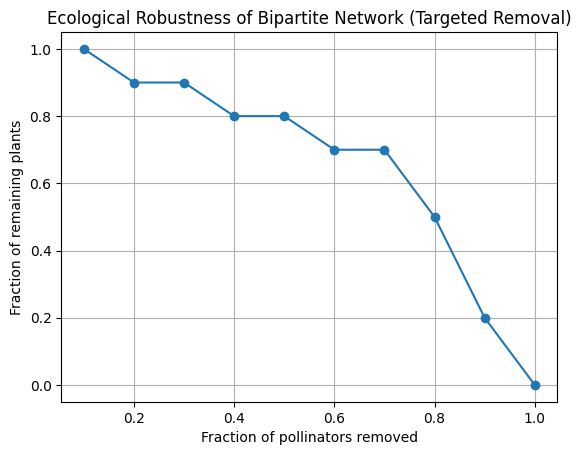

In [27]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to create a random bipartite network
def create_bipartite_network(num_plants, num_pollinators, connection_prob):
    B = nx.Graph()

    # Add nodes for plants and pollinators
    plants = [f'Plant_{i}' for i in range(num_plants)]
    pollinators = [f'Pollinator_{i}' for i in range(num_pollinators)]

    B.add_nodes_from(plants, bipartite=0)  # bipartite=0 for plants
    B.add_nodes_from(pollinators, bipartite=1)  # bipartite=1 for pollinators

    # Add edges based on a probability (connection between plants and pollinators)
    for plant in plants:
        for pollinator in pollinators:
            if random.random() < connection_prob:
                B.add_edge(plant, pollinator)

    return B, plants, pollinators

# Function to calculate the fraction of remaining plants
def calculate_remaining_plants(B, plants):
    remaining_plants = 0
    for plant in plants:
        if len(B[plant]) > 0:  # If plant still has connections
            remaining_plants += 1
    return remaining_plants / len(plants)

# Function to calculate robustness R
def calculate_robustness(B, plants, pollinators):
    robustness_curve = []

    while pollinators:
        # Find the pollinator with the largest degree (most connections)
        pollinator_degrees = [(pollinator, B.degree(pollinator)) for pollinator in pollinators]
        pollinator_to_remove = max(pollinator_degrees, key=lambda x: x[1])[0]

        # Remove that pollinator
        B.remove_node(pollinator_to_remove)
        pollinators.remove(pollinator_to_remove)

        # Calculate remaining fraction of plants
        remaining_plants_fraction = calculate_remaining_plants(B, plants)
        robustness_curve.append((len(pollinators) / len(plants), remaining_plants_fraction))

    # Calculate area under the curve
    area_under_curve = sum([r[1] for r in robustness_curve]) / len(robustness_curve)
    robustness_R = area_under_curve

    return robustness_curve, robustness_R

# Plot robustness curve
def plot_robustness_curve(robustness_curve):
    x_vals = [1 - r[0] for r in robustness_curve]
    y_vals = [r[1] for r in robustness_curve]

    plt.plot(x_vals, y_vals, marker='o')
    plt.xlabel("Fraction of pollinators removed")
    plt.ylabel("Fraction of remaining plants")
    plt.title("Ecological Robustness of Bipartite Network (Targeted Removal)")
    plt.grid(True)
    plt.show()

# Main execution
if __name__ == "__main__":
    # Create a bipartite network (e.g., 10 plants, 10 pollinators, 0.3 probability of connection)
    B, plants, pollinators = create_bipartite_network(10, 10, 0.3)

    # Calculate robustness and plot curve
    robustness_curve, robustness_R = calculate_robustness(B, plants, pollinators)

    print(f"Robustness (R): {robustness_R:.3f}")

    # Plot the robustness curve
    plot_robustness_curve(robustness_curve)


excel version

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Function to create bipartite network from an Excel adjacency matrix
def create_bipartite_network_from_excel(file_path):
    # Read the Excel file into a DataFrame
    df = pd.read_excel(file_path, index_col=0)

    # Create an empty bipartite graph
    B = nx.Graph()

    # Add plant nodes (rows) and pollinator nodes (columns) to the bipartite graph
    plants = df.index.tolist()  # Row names (plants)
    pollinators = df.columns.tolist()  # Column names (pollinators)

    B.add_nodes_from(plants, bipartite=0)  # Add plants as one set
    B.add_nodes_from(pollinators, bipartite=1)  # Add pollinators as another set

    # Add edges where the adjacency matrix has a '1'
    for plant in plants:
        for pollinator in pollinators:
            if df.loc[plant, pollinator] == 1:  # Check for interaction
                B.add_edge(plant, pollinator)

    return B, plants, pollinators

# Function to calculate the fraction of remaining plants
def calculate_remaining_plants(B, plants):
    remaining_plants = 0
    for plant in plants:
        if len(B[plant]) > 0:  # If plant still has connections
            remaining_plants += 1
    return remaining_plants / len(plants)

# Function to calculate robustness R
def calculate_robustness(B, plants, pollinators):
    robustness_curve = []

    while pollinators:
        # Find the pollinator with the largest degree (most connections)
        pollinator_degrees = [(pollinator, B.degree(pollinator)) for pollinator in pollinators]
        pollinator_to_remove = max(pollinator_degrees, key=lambda x: x[1])[0]

        # Remove that pollinator
        B.remove_node(pollinator_to_remove)
        pollinators.remove(pollinator_to_remove)

        # Calculate remaining fraction of plants
        remaining_plants_fraction = calculate_remaining_plants(B, plants)
        robustness_curve.append((len(pollinators) / len(plants), remaining_plants_fraction))

    # Calculate area under the curve
    area_under_curve = sum([r[1] for r in robustness_curve]) / len(robustness_curve)
    robustness_R = area_under_curve

    return robustness_curve, robustness_R

# Plot robustness curve (backwards)
def plot_robustness_curve(robustness_curve):
    # Reverse the x-axis to go from 1 to 0 (pollinators removed)
    x_vals = [1 - r[0] for r in robustness_curve]  # Reverse fraction of remaining pollinators
    y_vals = [r[1] for r in robustness_curve]

    plt.plot(x_vals, y_vals, marker='o')
    plt.xlabel("Fraction of pollinators remaining")
    plt.ylabel("Fraction of remaining plants")
    plt.title("Ecological Robustness of Bipartite Network (Targeted Removal)")
    plt.grid(True)
    plt.show()

# Main execution
if __name__ == "__main__":
    # Path to your Excel file
    file_path = 'your_bipartite_network.xlsx'

    # Create bipartite network from the Excel file
    B, plants, pollinators = create_bipartite_network_from_excel(file_path)

    # Calculate robustness and plot curve
    robustness_curve, robustness_R = calculate_robustness(B, plants, pollinators)

    print(f"Robustness (R): {robustness_R:.3f}")

    # Plot the robustness curve (backwards)
    plot_robustness_curve(robustness_curve)


for targeting specific groupd of devices (relays etc)


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Function to create bipartite network from an Excel adjacency matrix
def create_bipartite_network_from_excel(file_path):
    # Read the Excel file into a DataFrame
    df = pd.read_excel(file_path, index_col=0)

    # Create an empty bipartite graph
    B = nx.Graph()

    # Add plant nodes (rows) and pollinator nodes (columns) to the bipartite graph
    plants = df.index.tolist()  # Row names (plants)
    pollinators = df.columns.tolist()  # Column names (pollinators)

    B.add_nodes_from(plants, bipartite=0)  # Add plants as one set
    B.add_nodes_from(pollinators, bipartite=1)  # Add pollinators as another set

    # Add edges where the adjacency matrix has a '1'
    for plant in plants:
        for pollinator in pollinators:
            if df.loc[plant, pollinator] == 1:  # Check for interaction
                B.add_edge(plant, pollinator)

    return B, plants, pollinators

# Function to calculate the fraction of remaining plants
def calculate_remaining_plants(B, plants):
    remaining_plants = 0
    for plant in plants:
        if len(B[plant]) > 0:  # If plant still has connections
            remaining_plants += 1
    return remaining_plants / len(plants)

# Function to calculate robustness R
def calculate_robustness(B, plants, pollinators):
    robustness_curve = []

    while pollinators:
        # Find the pollinator with the largest degree (most connections)
        pollinator_degrees = [(pollinator, B.degree(pollinator)) for pollinator in pollinators]
        pollinator_to_remove = max(pollinator_degrees, key=lambda x: x[1])[0]

        # Remove that pollinator
        B.remove_node(pollinator_to_remove)
        pollinators.remove(pollinator_to_remove)

        # Calculate remaining fraction of plants
        remaining_plants_fraction = calculate_remaining_plants(B, plants)
        robustness_curve.append((len(pollinators) / len(plants), remaining_plants_fraction))

    # Calculate area under the curve
    area_under_curve = sum([r[1] for r in robustness_curve]) / len(robustness_curve)
    robustness_R = area_under_curve

    return robustness_curve, robustness_R

# New function to target specific plants or pollinators
def calculate_targeted_robustness(B, plants, pollinators, target_nodes, target_type='pollinators'):
    """
    This function calculates robustness, but only targets a subset of the nodes.
    `target_nodes`: list of specific plants or pollinators to remove
    `target_type`: whether the nodes to remove are 'plants' or 'pollinators'
    """
    robustness_curve = []

    if target_type == 'pollinators':
        target_list = [node for node in pollinators if node in target_nodes]
    elif target_type == 'plants':
        target_list = [node for node in plants if node in target_nodes]
    else:
        raise ValueError("target_type must be 'plants' or 'pollinators'")

    while target_list:
        # Remove the next target node
        node_to_remove = target_list.pop(0)
        B.remove_node(node_to_remove)

        # If removing pollinators, update the pollinators list
        if target_type == 'pollinators':
            pollinators.remove(node_to_remove)
        # If removing plants, update the plants list
        elif target_type == 'plants':
            plants.remove(node_to_remove)

        # Calculate remaining fraction of plants
        remaining_plants_fraction = calculate_remaining_plants(B, plants)
        robustness_curve.append((len(pollinators) / len(plants), remaining_plants_fraction))

    # Calculate area under the curve
    area_under_curve = sum([r[1] for r in robustness_curve]) / len(robustness_curve)
    robustness_R = area_under_curve

    return robustness_curve, robustness_R

# Plot robustness curve (backwards)
def plot_robustness_curve(robustness_curve):
    # Reverse the x-axis to go from 1 to 0 (pollinators removed)
    x_vals = [1 - r[0] for r in robustness_curve]  # Reverse fraction of remaining pollinators
    y_vals = [r[1] for r in robustness_curve]

    plt.plot(x_vals, y_vals, marker='o')
    plt.xlabel("Fraction of pollinators remaining")
    plt.ylabel("Fraction of remaining plants")
    plt.title("Ecological Robustness of Bipartite Network (Targeted Removal)")
    plt.grid(True)
    plt.show()

# Main execution
if __name__ == "__main__":
    # Path to your Excel file
    file_path = 'your_bipartite_network.xlsx'

    # Create bipartite network from the Excel file
    B, plants, pollinators = create_bipartite_network_from_excel(file_path)

    # Example: Target only specific pollinators for removal
    target_pollinators = ['Pollinator_1', 'Pollinator_3']  # Change this to your actual pollinators
    robustness_curve, robustness_R = calculate_targeted_robustness(B, plants, pollinators, target_pollinators, target_type='pollinators')

    print(f"Robustness (R): {robustness_R:.3f}")

    # Plot the robustness curve (backwards)
    plot_robustness_curve(robustness_curve)


animated graph option, not complete

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Function to create bipartite network from an Excel adjacency matrix
def create_bipartite_network_from_excel(file_path):
    # Read the Excel file into a DataFrame
    df = pd.read_excel(file_path, index_col=0)

    # Create an empty bipartite graph
    B = nx.Graph()

    # Add plant nodes (rows) and pollinator nodes (columns) to the bipartite graph
    plants = df.index.tolist()  # Row names (plants)
    pollinators = df.columns.tolist()  # Column names (pollinators)

    B.add_nodes_from(plants, bipartite=0)  # Add plants as one set
    B.add_nodes_from(pollinators, bipartite=1)  # Add pollinators as another set

    # Add edges where the adjacency matrix has a '1'
    for plant in plants:
        for pollinator in pollinators:
            if df.loc[plant, pollinator] == 1:  # Check for interaction
                B.add_edge(plant, pollinator)

    return B, plants, pollinators

# Function to calculate robustness R with animation
def calculate_robustness_with_animation(B, plants, pollinators):
    # Initialize figure and axis
    fig, ax = plt.subplots()
    pos = nx.spring_layout(B)  # Layout for network positions
    removed_nodes = []  # Keep track of removed nodes
    frames = []  # Store the graph state after each removal

    # This function will update the plot for each animation frame
    def update(frame):
        ax.clear()  # Clear previous frame
        current_B = frame[0]
        removed_node = frame[1]

        # Draw the current state of the graph
        nx.draw(current_B, pos, with_labels=True, ax=ax, node_color="lightblue", edge_color="gray")

        # Highlight the removed node (if any)
        if removed_node:
            ax.set_title(f"Removed: {removed_node}")
        else:
            ax.set_title("Initial State")

        # Set axis limits
        ax.set_xlim([1.5 * limit for limit in ax.get_xlim()])
        ax.set_ylim([1.5 * limit for limit in ax.get_ylim()])

    # Capture each elimination step and graph state
    while pollinators:
        # Save the current state of the graph before removing the next pollinator
        frames.append((B.copy(), None))  # Append a copy of the graph before removal

        # Find the pollinator with the largest degree (most connections)
        pollinator_degrees = [(pollinator, B.degree(pollinator)) for pollinator in pollinators]
        pollinator_to_remove = max(pollinator_degrees, key=lambda x: x[1])[0]

        # Remove that pollinator
        B.remove_node(pollinator_to_remove)
        pollinators.remove(pollinator_to_remove)

        # Append the graph state after the removal
        frames.append((B.copy(), pollinator_to_remove))

    # Create the animation
    ani = FuncAnimation(fig, update, frames=frames, repeat=False, interval=1000)

    # Show the animation
    plt.show()

    return ani

# Main execution
if __name__ == "__main__":
    # Path to your Excel file
    file_path = 'your_bipartite_network.xlsx'

    # Create bipartite network from the Excel file
    B, plants, pollinators = create_bipartite_network_from_excel(file_path)

    # Calculate robustness and animate the process
    ani = calculate_robustness_with_animation(B, plants, pollinators)
